<a href="https://colab.research.google.com/github/bsttiv/Tarea-3/blob/main/Tarea3_Desarrollo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<a target="_blank" href="https://colab.research.google.com/github/AsCiDEN/Tarea-3/blob/main/Tarea3.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

# **CD2201-16: Ciencia de Datos en Astronomía**

**Profesores:** Boris Cuevas, Paula Díaz, Danilo Sepúlveda, Francisco Urbina

# **Tarea 3: Ajuste de modelos**

El objetivo de esta tarea es ajustar diferentes modelos a las curvas de rotación de galaxias y, evaluando con las métricas presentadas en clases, concluír que la materia oscura es capaz de explicar la fenomenología descrita por las observaciones.

## **¿Materia oscura o solo materia luminosa?**

La curva de rotación de una galaxia es la velocidad a la cual sus estrellas o gas rota en torno a su centro como función de la distancia. Asumiendo movimiento circular y la ley de Gravitación de Newton, se puede obtener la siguiente fórmula para la curva de rotación (o ecuación de movimiento):

\begin{equation}
\tag{1}
a_c(R) = \frac{v^2(R)}{R} = \frac{G M(r\leq R)}{R^2} \implies v(R) = \sqrt{\frac{GM(r\leq R)}{R}},
\end{equation}

donde  $G$ es la constante de gravitación universal, y
\begin{equation}
\tag{2}
M(R) = M(r\leq R)= 4\pi \int_{0}^R \rho(r)r^2 dr,
\end{equation}
es decir, es la masa encerrada en una esfera de radio $R$ para una densidad de masa volumétrica $\rho(r)$.

Bajo esta ecuación, si conocemos la curva de rotación $v(R)$ de una galaxia, podemos inferir su distribución de masa y vice versa.

Una forma de obtener $M(R)$ es asumiendo que la masa de las galaxias está dominada por su componente estelar, y por ende, que existe una relación de proporcionalidad entre perfil de masa galáctico y el perfil luminoso de cada galaxia, esto ha llevado a proponer perfiles de tipo exponenciales (o de Sérsic) de la forma:

\begin{equation}
\tag{3}
M_{star}(R, M_1, R_1) = M_1 \times \left[1 - \frac{\exp(-R/R_1)(R_1 + R)}{R_1} \right]
\end{equation}

Note que este perfil depende de dos parámetros que caracterizan la masa ($M_1$) y el tamaño típico ($R_1$) de la galaxia de estudio.

**P1)**
1.   Para esta parte de la tarea será necesario trabajar con unidades, en particular, para distancias galácticas la unidad más típica es el kilo-parsec. Defina que es un kilo-parsec (kpc) y muestre su equivalencia en metros. ¿Cuántos planeta Tierra puede colocar uno al lado del otro dentro de 1 kpc de distancia?

**Respuesta:**

Un kilo-parsec son mil pársecs, y un pársec es una unidad de longitud correspondiente a la distancia en la que una unidad astronómica (149.6 millones de km) subtiende un segundo de arco (1/3600 grados). Por lo tanto, un pársec es igual a $3,0857*10^{16}$ metros. De esta manera, se obtiene que un kilo-pársec es igual a $3,0857*10^{19}$ metros.

Así, podemos obtener que en un kilo-pársec caen $\frac{3,0857*10^{19}}{D}$ planeta Tierra con $D = 12742000$ (diámetro de la Tierra en metros), es decir, aproximadamente 2421676345942.

2. Grafique la curva de velocidad $v(R)$ para la distribución de masa dada en la ecuación (3). Para ello considere $M_1 = 10^{10} M_{\odot}$ y $R_1 = 5 $ kpc, donde $M_\odot \approx 1.989\times 10^{30}$ kg es la masa del sol.

**Nota:** Para esta tarea puede utilizar el módulo [astropy.units](https://docs.astropy.org/en/stable/units/) para lidiar fácilmente con las unidades. Esto es completamente opcional, no se asignará puntaje extra si es que lo hacen, pero puede investigarlo si así lo desea. Tampoco se descontará en caso contrario.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
G = 6.67e-11 # constante de gravitación universal en unidades de m^3 kg^-1 s^-2
kpc_to_m =  3.0857E19 # rellene con el valor de 1 kpc en metros
solar_masses_to_kg = 1.989e30 # 1 masa solar en kg

Text(0, 0.5, 'Velocidad (km/s)')

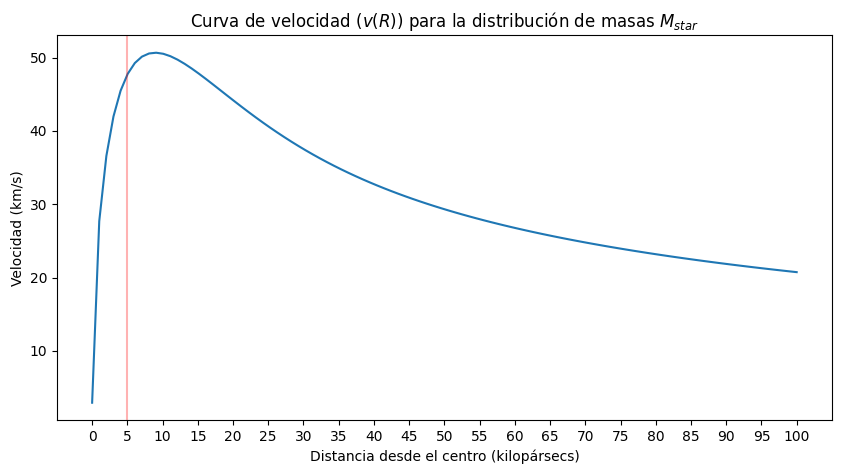

In [3]:
# Cree la función M_star(R, M_1, R_1) según la ecuación (1)

def M_star(R, M_1, R_1):
  # Según la ecuación (3): M_Star = M1*[1 - (exp(-R/R1)(R1+R))/R1]
  return M_1*(1 - (np.exp(-R/R_1)*(R_1+R))/R_1)

# Cree la función v_R_stars(R, M1, R1) utilizando la ec. (3) en (1). v(R) debe tener unidades de km/s
# Tenga cuidado con las unidades, como referencia la velocidad debería quedar entre ~10-50 km/s
def v_R_stars(R, M1, R1):
  # Reemplazando la ecuación (3) en (1), obtenemos que v(R) = sqrt(G*M_star/R) y se divide por mil para obtener las unidades de km/s
  # Nota: los valores que recibe están en masas solares y kilopársecs
  masa_kg = M_star(R, M1, R1)*solar_masses_to_kg
  distancia_m = R*kpc_to_m
  return np.sqrt(G*masa_kg/(distancia_m))/1000

# Cree el arreglo "R", con distancias desde 0.01 a 100 kpc de forma equiespaciada con 100 elementos.
R = np.linspace(0.01, 100, 100)

# De lo indicado en el enunciado, obtenemos las siguientes constantes
M1 = 1E10
R1 = 5

# Calcule v(R) en km/s colocando la ecuación (3) en (1) y haga el gráfico correspondiente
v_r_stars = v_R_stars(R, M1, R1)

# Haga el gráfico :)
# No olvide en cada eje indicar las unidades.

# Creamos el gráfico, añadimos los títulos y se marca el punto D=R1
_, ax = plt.subplots(1,1, figsize=(10,5))
ax.plot(R, v_r_stars)
ax.set_title("Curva de velocidad ($v(R)$) para la distribución de masas $M_{star}$")
ax.set_xlabel("Distancia desde el centro (kilopársecs)")
ax.axvline(x=R1, alpha=0.3, color='red')
ax.set_xticks(np.arange(0, 101, step=5))
ax.set_ylabel("Velocidad (km/s)")

3. ¿Qué puede decir del comportamiento de $v(R)$ para $R \gg R_1$? Aproxime $M(R)$ en dicho caso e indique la forma que tendrá $v(R)$.

**Respuesta:** Podemos observar que $v(R)$ tiende a decrecer exponencialmente hasta llegar a una asíntota cerca de los 20km/s.

Así, podemos aproximar $M(R) \approx \frac{400R}{G}$


 Note que dicha curva tiene la misma forma que la [curva de rotación de los planetas en el sistema solar!](https://sites.temple.edu/profnewby/2019/05/04/solar-system-rotation-curve/)

En 1978, la astrónoma Vera Rubin descubrió que, para distancias grandes, la curva de rotación no seguía la forma predicha por los típicos perfiles de masa (como aquel que usted describió en la parte anterior).

Una forma de resolver este misterio es incorporando un segundo elemento que está aportando de forma considerable a la distribución de materia, pero que aparentemente no emite ni absorbe nada de luz, apodado como **materia oscura**.

En 1997, Julio Navarro, Carlos Frenk y Simon White publicaron [un artículo científico](https://iopscience.iop.org/article/10.1086/304888/pdf) en el cual proponían un perfil de densidad $\rho(r)$ para la materia oscura a partir de resultados de simulaciones numéricas. Este perfil de densidad permite obtener la masa encerrada en un radio $R$ de la forma:

\begin{equation}
\tag{4}
M_{dm}(R, M_0, R_0) = M_0 \times \left[\ln\left(\frac{R_0 + R}{R_0}\right)  + \frac{R_0}{R_0 + R} - 1\right]
\end{equation}

4. Añada al gráfico anterior la curva de rotación dada por perfil de la ecuación (4) considerando $M_0 = 5\times 10^{10} M_{\odot}$, y $R_0 = 20$ kpc, recuerde añadir una leyenda adecuada que permita identificar ambos perfiles.


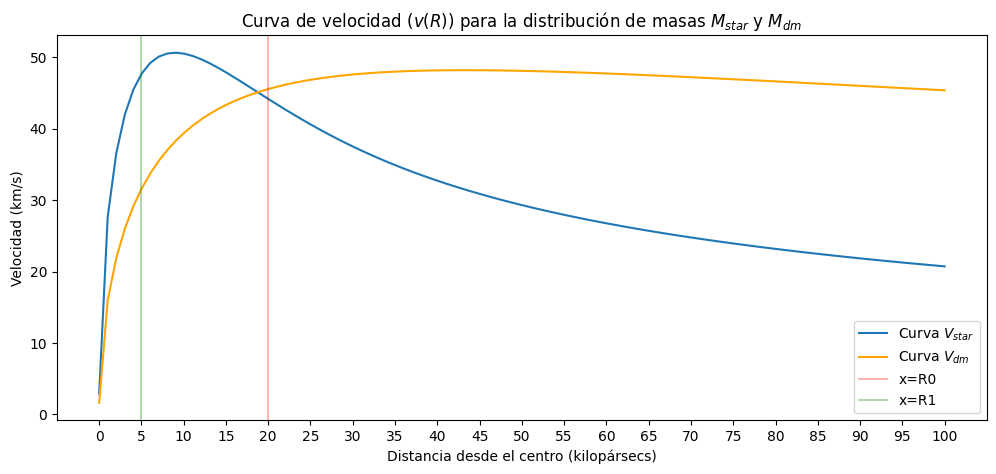

In [4]:
# Parta por definir la función M_dm(R, M0, R0) tal como se definió en la ec. (4)
def M_dm(R, M0, R0):
  # Según la ecuación (4), tenemos que M_dm = M0*[ln((R0+R)/R0) + R0/(R0+R) - 1]
  frac = (R0+R)/R0
  ln = np.log(frac)
  return M0*(ln + 1/frac -1)

# Cree la función v_R_dm(R, M0, R0) utilizando la ec. (4) en (1). v(R) debe tener unidades de km/s
def v_R_dm(R, M0, R0):
  # Reemplazando la ecuación (4) en (1), obtenemos que v(R) = sqrt(G*M_dm/R) y se divide por mil para obtener las unidades de km/s
  # Nota: los valores que recibe están en masas solares y kilopársecs
  masa_kg = M_dm(R, M0, R0)*solar_masses_to_kg
  distancia_m = R*kpc_to_m
  return np.sqrt(G*masa_kg/(distancia_m))/1000

# Utilice el mismo arreglo R de la parte anterior.
# Repita el cálculo de v(R) pero para el perfil de la ecuación (4)
# No olvide graficar ambas curvas de rotación y colocar una leyenda.

# Datos entregados en el enunciado
M0 = 5E10
R0 = 20

# Se obtiene la nueva lista de valores
v_r_dm = v_R_dm(R, M0, R0)

# Se grafican las dos curvas en un gráfico con el objetivo de compararlas
_, ax = plt.subplots(1,1, figsize=(12,5), sharey=True)

# Primera Curva
ax.plot(R, v_r_stars, label = "Curva $V_{star}$")

# Segunda curva
ax.plot(R, v_r_dm, color='orange', label = "Curva $V_{dm}$")

# Se marcan los puntos x=R0 y x=R1
ax.axvline(x=R0, alpha=0.3, color='red', label="x=R0")
ax.axvline(x=R1, alpha=0.3, color='green', label="x=R1")

# Se establecen los ticks en el eje x
ax.set_xticks(np.arange(0, 101, step=5))

# Se aplican los respectivos títulos
ax.set_ylabel("Velocidad (km/s)")
ax.set_xlabel("Distancia desde el centro (kilopársecs)")
ax.set_title("Curva de velocidad ($v(R)$) para la distribución de masas $M_{star}$ y $M_{dm}$")

# Se añaden las respectivas leyendas
ax.legend()

5. ¿Qué componente parece dominar a distancias cortas? ¿Cuál a distancias largas?

**Respuesta (corta):** A cortas y largas distancias parece dominar la masa estelar y la materia oscura respectivamente.

Es razonable pensar que uno necesita tanto el componente deducido por la masa estelar (o luminosa) como aquella que no interactúa con la luz (materia oscura), por lo que un perfil de masa más completo involucra una suma de cada componente tal como se describe en la siguiente ecuación:

\begin{equation}
\tag{5}
M_{tot}(R, M_0, R_0, M_1, R_1 ) =  M_{dm}(R,M_0, R_0) + M_{star}(R, M_1, R_1)
\end{equation}

Ahora analizaremos la curva de rotación de la [galaxía NGC 6503](https://es.wikipedia.org/wiki/NGC_6503), para ello cargaremos el archivo **velocity_curve_NGC6503.txt**.

Las columnas del archivo tienen la siguiente información, distancia del centro (en kpc), velocidad medida (en km/s) y el error estándar en la medición (en km/s).

In [5]:
# Partiremos por "montar" el drive, esto permite que podamos leer los archivos de nuestro drive
from google.colab import drive
drive.mount('/content/drive')    # se les debe abrir una pestaña extra pidiendo permisos

Mounted at /content/drive


In [19]:
# Encuentren la ruta de su archivo, para ello puede utilizar la barra de herramientas izquierda
# lleguen a su archivo desde su "drive" y con el click derecho "copiar ruta" y luego la pegan
# como un string en la siguiente variable.
path_archivo = 'drive/MyDrive/Modulo/Tarea3/velocity_curve_NGC6503.txt'
datos = np.loadtxt(path_archivo)

# Hacemos un slice del array para obtener las columnas

# Nota: se utiliza flatten para eliminar los subarrays que se crean debido al slicing
distancia_del_centro = datos[:,[0]].flatten()
velocidad_medida = datos[:,[1]].flatten()
error_estandar = datos[:,[2]].flatten()

Text(0.5, 1.0, 'Curva de rotación de la galaxia NGC 6503')

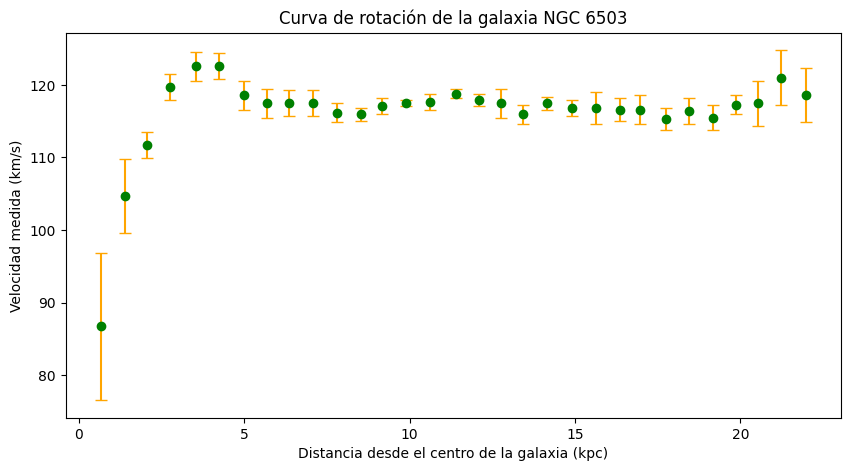

In [7]:
# Haga un gráfico de la curva de rotación incluyendo barras de error con plt.errorbar
# No olvide añadir todo lo esencial de un gráfico y que los errores se vean de forma clara.
# Para mejor claridad cuando comparemos con modelos, haga que los puntos NO estén conectados por alguna línea.

# Se crea el gráfico usando errorbar, se le elimina la linea y se añade el parámetro capsize para establecer el tamaño de la linea de error.
# Se usa yerr=error_estandar entregado por el archivo de texto
_, ax = plt.subplots(1,1, figsize=(10,5))
ax.errorbar(distancia_del_centro, velocidad_medida, yerr=error_estandar, marker='o', capsize=4, ecolor='orange', linestyle='none', color='green')
ax.set_xlabel("Distancia desde el centro de la galaxia (kpc)")
ax.set_ylabel("Velocidad medida (km/s)")
ax.set_title("Curva de rotación de la galaxia NGC 6503")

Ajustaremos 3 modelos de curva de rotación para esta galaxia.

1. Solo componente estelar.
2. Solo materia oscura.
3. Componente estelar y materia oscura.

¿Es este un problema de ajuste de modelos lineal o no-lineal?

**Respuesta (una o dos palabras):** no lineal

In [8]:
# Importamos curve_fit que se encargará de hacer el ajuste.
from scipy.optimize import curve_fit

In [9]:
# Escriba la función v_R_tot(R, M0, R0, M1, R1) que utiliza M_tot descrito en la ecuación (5).
# Hint: puede directamente construir esta ecuación con v_R_dm y v_R_stars, le puede ahorrar errores.
def v_R_tot(R_x, M0, R0, M1, R1):
  # De reemplazar M_tot en la ecuación (1) y usando valores anteriormente calculados, obtenemos que V_tot = || (V_star, V_dm) || (Norma en R2)
  return np.sqrt(v_R_stars(R_x, M1, R1)**2 + v_R_dm(R_x, M0, R0)**2)

# Utilice curve_fit para ajustar los 3 modelos antes mencionados. Incluya los errores.
# Para las condiciones iniciales, considere masas entre 1e10 a 1e11 masas solares, y radios entre 1 a 20 kpc.
# Rellene según corresponda, ignore las variables "pcov"

# Para V_stars se utiliza curve_fit con la funcion v_R_stars, y los datos entregados de la galaxia (con error=error_estandar), junto con parametros iniciales [6e10, 4]

popt_stars, pcov_stars = curve_fit(v_R_stars, distancia_del_centro, velocidad_medida, [6e10, 4], sigma=error_estandar)

# Para V_dm se utiliza curve_fit con la funcion v_R_dm, y los datos entregados de la galaxia (con error=error_estandar), junto con parametros iniciales [5e10, 3]

popt_dm, pcov_dm = curve_fit(v_R_dm, distancia_del_centro, velocidad_medida, [5e10, 3], sigma=error_estandar)

# Para V_tot se utiliza curve_fit con la funcion v_R_tot, y los datos entregados de la galaxia (con error=error_estandar), junto con parametros iniciales [4e10, 6, 2e10, 1]

popt_tot, pcov_tot = curve_fit(v_R_tot, distancia_del_centro, velocidad_medida, [4e10, 6, 2e10, 1], sigma=error_estandar)

Text(0.5, 1.0, 'Modelo optimo encontrado para la curva $V_{tot, dm, stars}$ y datos reales en la galaxia NGC 6503')

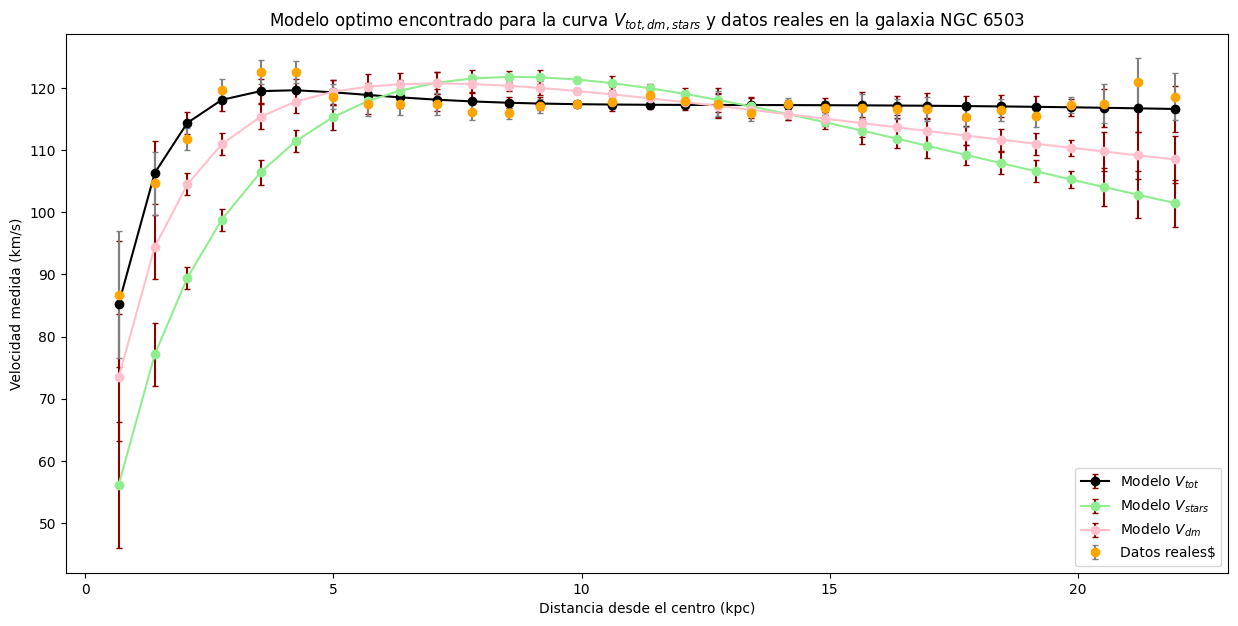

In [33]:
# En el gráfico de los datos, añada los 3 modelos con los parámetros óptimos encontrados en la parte anterior.
# No olvide añadir una leyenda adecuada.

# Se crea un gráfico para poder visualizar los datos de mejor manera
_, ax = plt.subplots(1, 1, figsize=(15, 7))

# Se calcula los valores de y predichos por el modelo no lineal
v_stars_modelo = v_R_stars(distancia_del_centro, *popt_stars)
v_dm_modelo = v_R_dm(distancia_del_centro, *popt_dm)
v_tot_modelo = v_R_tot(distancia_del_centro, *popt_tot)


# Se grafican los datos reales y la predicción utilizando errorbar.
ax.errorbar(distancia_del_centro, v_tot_modelo, label="Modelo $V_{tot}$", color="black", marker = 'o', yerr=error_estandar, capsize=2, ecolor='darkred')
ax.errorbar(distancia_del_centro, v_stars_modelo, label="Modelo $V_{stars}$", color="lightgreen", marker = 'o', yerr=error_estandar, capsize=2, ecolor='darkred')
ax.errorbar(distancia_del_centro, v_dm_modelo, label="Modelo $V_{dm}$", color="pink", marker = 'o', yerr=error_estandar, capsize=2, ecolor='darkred')
ax.errorbar(distancia_del_centro, velocidad_medida, label="Datos reales$", color="orange", marker = 'o', linestyle='none', yerr=error_estandar, capsize=2, ecolor='gray')

# Se aplican las leyendas
ax.legend()

# Se aplican los titulos correspondientes
ax.set_xlabel("Distancia desde el centro (kpc)")
ax.set_ylabel("Velocidad medida (km/s)")
ax.set_title("Modelo optimo encontrado para la curva $V_{tot, dm, stars}$ y datos reales en la galaxia NGC 6503")

Evaluaremos cada modelo con la métrica $\chi ^2$ definida como:

$$\chi ^2 = \sum_{i=1}^N \frac{(y_i - v_R(x_i))^2}{\sigma_i^2}, $$

donde $y_i$ es el dato de la velocidad de rotación en la distancia $x_i$, cuyo error de medición es $\sigma_i$ y $v_R$ es el modelo respectivo.


In [32]:
# Para evaluar las métricas necesita primero evaluar su modelo en cada x_i

# Usare las variables que se crearon arriba, que son exactamente las mismas

# pred_tot = v_R_tot()
# pred_dm = v_R_dm()
# pred_stars = v_R_stars()

# Defina la función chi_cuadrado(datos, sigma, pred), donde datos, sigma y pred
# son arreglos de igual largo que contienen los datos y_i, los errores sigma_i y
# la predicción de algún modelo.
# Esto se puede hacer en 1 línea con arreglos de numpy :)

def chi_cuadrado(datos, sigma, pred):
  # Según la formula, podemos utilizar simplemente np.sum y usar operaciones de arrays de numpy para conseguir los resultados
  return np.sum(((datos-pred)**2) / (sigma**2))

# Haga un print reportando el chi-cuadrado de cada modelo. Rellene según corresponda.

print('Chi-cuadrado (dm+stars): ', chi_cuadrado(velocidad_medida, error_estandar, v_tot_modelo))
print('Chi-cuadrado (dm-only): ', chi_cuadrado(velocidad_medida, error_estandar, v_dm_modelo))
print('Chi-cuadrado (stars-only): ', chi_cuadrado(velocidad_medida, error_estandar, v_stars_modelo))

Chi-cuadrado (dm+stars):  26.088941492797993
Chi-cuadrado (dm-only):  223.74106989919449
Chi-cuadrado (stars-only):  853.3934034806805


**Responda:**
1. ¿Qué modelo ajusta mejor los datos bajo la métrica anterior? ¿El peor?

El modelo que mejor ajusta los datos es el de $V_{tot}$, pues tiene menor chi cuadrado, mientras que el peor es el que solo considera la masa estelar.

2. ¿Qué puede concluír de los constituyentes de la galaxia NGC6503?

Se puede concluir que un importante porcentaje de la galaxia NGC6503 corresponde a materia oscura, pues este modelo no tuvo tan mal rendimiento como el de la masa estelar.

## **¿Cuántos parámetros utilizo?**

En el problema anterior el modelo que utilizamos tenía una motivación física, no estaba escogido "al azar". En esta parte trataremos de modelar algo del cual no tenemos una motivación física para proponer un modelo, en estos casos siempre debe primar el utilizar modelos sencillos por sobre modelos de alta complejidad o con muchos parámetros. En particular, ajustaremos polinomios de distinto grado y determinaremos el grado óptimo del modelo tal que su capacidad predictiva no se vea alterada.

Partiremos por generar los datos.

Considere la siguiente función:

$$f(x) = 5\sin(x) + 5\cos(x^2) + 3$$

Le añadiremos ruido utilizando una distribución normal $N(\mu= 0, \sigma=2)$.

In [13]:
np.random.seed(123)  # investigue que hace esta línea de código

**Responda:**
- ¿Qué hace la línea de código anterior? ¿Por qué es una buena práctica utilizar una "semilla" cuando se realizan experimentos aleatorios?

Esta línea de código establece la "semilla" para el generador de números pseudoaleatorios (pues se basan en algoritmos, y por lo tanto no es completamente aleatorio). De esta manera, al llamar a una función de np.random, los valores generados permanecerán constantes a lo largo de múltiples ejecuciones.

Es una buena práctica usar una "semilla", pues los datos generados serán aleatorios, pero no cambiarán durante el tiempo y eso permite un análisis más exhaustivo.

Text(0.5, 1.0, 'Gráfico de función $f(x)$ con y sin ruido vs valores de x')

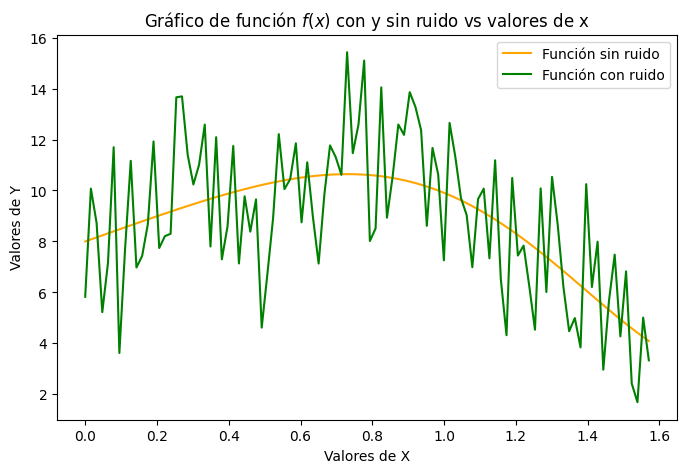

In [14]:
N_data = 100
x = np.linspace(0,np.pi/2, N_data)

# Calcule un arreglo con los valores de la función f(x) con el arreglo antes definido

# Se usan operaciones de arrays de numpy para calcular la imagen de la funcion f(x) con x en [0, pi/2)
y_real = 5*np.sin(x) + 5*np.cos(x**2) + 3

# Ahora sume el "ruido" aleatorio. Para ello utilice np.random.normal()
# Revise la documentación y utilice una desviación estándar igual a 2

# Se usa np.random.normal con mean = 0, std= 2 y size=N_data, y usando operaciones de arrays de numpy se le añade a los valores reales
y_ruido = np.random.normal(0, 2, N_data) + y_real

# Visualice sus datos :)
# Puede graficar la función sin ruido si así lo desea. (opcional)

# Se crea el gráfico y se añade la curva y_real en naranjo, junto con y_ruido en verde
_, ax = plt.subplots(1, 1, figsize=(8, 5))
ax.plot(x, y_real, color='orange', label="Función sin ruido")
ax.plot(x, y_ruido, color='green', label="Función con ruido")
# Se añaden las leyendas y titulos respectivos
ax.legend()
ax.set_xlabel("Valores de X")
ax.set_ylabel("Valores de Y")
ax.set_title("Gráfico de función $f(x)$ con y sin ruido vs valores de x")

Ahora, de forma similar a lo visto en clases, haremos un ajuste con modelos polinomiales y, utilizando cross-validation, determinaremos el grado del polinomio óptimo a modo de favorecer la capacidad predictiva del modelo.

In [15]:
# Importamos los esenciales :)
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [16]:
# En la siguiente variable guardaremos el error asociado a los modelos
# Exploraremos polinomios de grado 1 hasta 10, cada fila estará asociada a un modelo
# distinto y las columnas a alguna iteración de cross-validation

N_iteraciones  = 100 # puede cambiar este valor si lo desea
errores_modelos = np.zeros((10, N_iteraciones))

Ahora, repita el siguiente experimento para realizar cross-validation. Para cada iteración debe hacer lo siguiente:

- Divida el dataset en entrenamiento y testeo (use una proporción adecuada). Utilice la función train_test_split!
- Con el set de entrenamiento ajuste el modelo polinomial (desde el grado 1 al 10). Puede utilizar PolynomialFeatures para generar la matriz de diseño que necesite, use include_bias=True.  
- Evalúe su modelo en los datos de testeo y utilice las predicciones para evaluar el mean_squared_error.
- Guarde el MSE en la matriz de errores.

In [17]:
for i in range(100):
  # Rellene según corresponda

  # Se usa train_test_split para separar los arrays en un 75% entrenamiento y 25% testeo (valores por defecto de la función)
  x_train, x_test, y_train, y_test = train_test_split(x, y_ruido)
  for j in range(10):
    # Aquí puede iterar para cada modelo o grado del polinomio :) (cuidado que j parte siendo 0)

    # Se crea el modelo polinómico con grado j+1, e include_bias=True para añadir una columna de unos a la matriz de diseño
    poly = PolynomialFeatures(j+1, include_bias=True)

    # Hacemos un fit_transform sobre los valores de x para escalar nuestros datos. Reshape se usa para transformar el array en un vector columna.
    poly_train = poly.fit_transform(x_train.reshape(-1, 1))
    poly_test = poly.fit_transform(x_test.reshape(-1, 1))

    # Se crea el modelo de regresión lineal
    modelo = LinearRegression()

    # Lo entrenamos usando nuestros datos de entrenamiento entregados por train_test_split
    modelo.fit(poly_train, y_train)

    # Realizamos la predicción con los datos de entrenamiento
    y_pred = modelo.predict(poly_test)

    # Guardamos el MSE de los datos de testeo vs predicción
    errores_modelos[j, i] = mean_squared_error(y_test, y_pred)

Finalmente, grafique el MSE promedio de las N iteraciones, para cada modelo y decida cuál es el grado óptimo del polinomio que debería utilizar para su modelo.

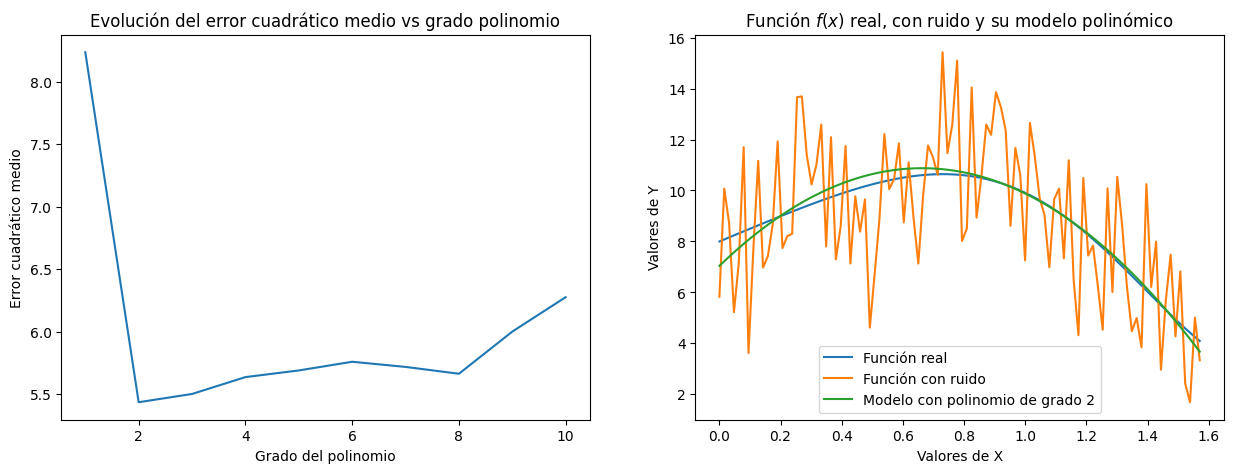

In [18]:
# Note que para calcular el promedio pedido puede utilizar np.mean(errores_modelos, axis=1) ¿qué hace el parámetro axis=1?

# Al incluir el parámetro axis = 1, estamos diciendo que la media aritmética se calculará a lo largo de cada fila
promedio_modelos = np.mean(errores_modelos, axis=1)
# Añada su gráfico.

# Se crea un gráfico de dos columnas para observar la evolución del MSE y otro que contenga el modelo.
_, ax = plt.subplots(1, 2, figsize=(15, 5))

# Realizamos el primer gráfico incluyendo los títulos correspondientes
ax[0].plot(range(1, 11), promedio_modelos)
ax[0].set_xlabel("Grado del polinomio")
ax[0].set_ylabel("Error cuadrático medio")
ax[0].set_title("Evolución del error cuadrático medio vs grado polinomio")

# Realizamos el modelo polinómico de grado 2
poly = PolynomialFeatures(2, include_bias=True)
poly_train = poly.fit_transform(x.reshape(-1, 1))
modelo = LinearRegression()
modelo.fit(poly_train, y_ruido)

# Se grafica la función real, con ruido y el modelo (creo que no es necesario, pero es por curiosidad)
ax[1].plot(x, y_real, label="Función real")
ax[1].plot(x, y_ruido, label="Función con ruido")
ax[1].plot(x, modelo.predict(poly_train), label="Modelo con polinomio de grado 2")

# Se añaden los títulos y leyendas
ax[1].set_xlabel("Valores de X")
ax[1].set_ylabel("Valores de Y")
ax[1].set_title("Función $f(x)$ real, con ruido y su modelo polinómico")
ax[1].legend()

El grado óptimo del polinomio es el de grado 2, pues tiene menor MSE.